<a href="https://colab.research.google.com/github/Shreyas-2607/BIS_LAB/blob/main/Parallel_Cellular_Algorithm_1BM23CS321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iter 1/100  best fitness = 0.008385 at (np.int64(8), np.int64(6))
Iter 11/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 21/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 31/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 41/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 51/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 61/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 71/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 81/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 91/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))
Iter 100/100  best fitness = 0.000874 at (np.int64(7), np.int64(7))

Final best fitness: 0.000874384227484093
Best cell position: (np.int64(7), np.int64(7))
Value at that cell (x): -0.2948581138262784
Objective at that x (should match best fitness): 5.266373762594304


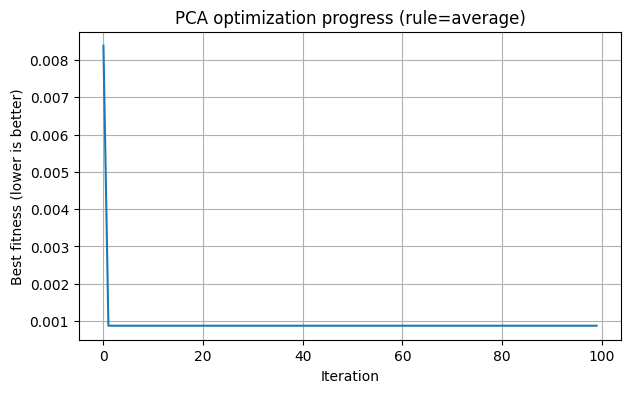

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def objective(x: np.ndarray) -> np.ndarray:
    # f(x) = x^2 - 4x + 4
    return x**2 - 4*x + 4

class ParallelCellularAlgorithm:
    def __init__(
        self,
        grid_size: Tuple[int,int] = (10,10),
        value_range: Tuple[float,float] = (-10.0, 10.0),
        neighborhood_radius: int = 1,
        iterations: int = 100,
        update_rule: str = 'average',
        mutation_sigma: float = 0.01,
        toroidal: bool = True
    ):
        self.rows, self.cols = grid_size
        self.min_val, self.max_val = value_range
        self.r = neighborhood_radius
        self.iterations = iterations
        assert update_rule in ('average','best_neighbor')
        self.update_rule = update_rule
        self.mutation_sigma = mutation_sigma
        self.toroidal = toroidal

        self.grid = np.random.uniform(self.min_val, self.max_val, size=(self.rows, self.cols))
        # track best seen
        self.best_value = None
        self.best_pos = None
        self.history_best = []

    def _get_neighbors_indices(self, i: int, j: int):
        for di in range(-self.r, self.r+1):
            for dj in range(-self.r, self.r+1):
                ni = i + di
                nj = j + dj
                if self.toroidal:
                    ni %= self.rows
                    nj %= self.cols
                    yield ni, nj
                else:
                    if 0 <= ni < self.rows and 0 <= nj < self.cols:
                        yield ni, nj

    def step(self):
        new_grid = np.copy(self.grid)
        fitness = objective(self.grid)

        for i in range(self.rows):
            for j in range(self.cols):
                neigh_coords = list(self._get_neighbors_indices(i, j))
                neigh_vals = np.array([ self.grid[ni, nj] for (ni,nj) in neigh_coords ])
                neigh_fit  = np.array([ fitness[ni, nj] for (ni,nj) in neigh_coords ])

                if self.update_rule == 'average':
                    updated = neigh_vals.mean()
                else:
                    best_idx = np.argmin(neigh_fit)
                    updated = neigh_vals[best_idx]

                mutation = np.random.normal(scale=self.mutation_sigma)
                new_grid[i,j] = updated + mutation

        self.grid = new_grid

        all_fitness = objective(self.grid)
        min_idx_flat = np.argmin(all_fitness)
        min_val = all_fitness.flat[min_idx_flat]
        min_pos = (min_idx_flat // self.cols, min_idx_flat % self.cols)

        if (self.best_value is None) or (min_val < self.best_value):
            self.best_value = min_val
            self.best_pos = min_pos

        self.history_best.append(self.best_value)

    def run(self, verbose: bool = True):
        for it in range(self.iterations):
            self.step()
            if verbose and (it % max(1, self.iterations // 10) == 0 or it == self.iterations-1):
                print(f"Iter {it+1}/{self.iterations}  best fitness = {self.best_value:.6f} at {self.best_pos}")

        return {
            'best_fitness' : self.best_value,
            'best_pos' : self.best_pos,
            'best_value_at_pos' : self.grid[self.best_pos] if self.best_pos is not None else None,
            'history_best' : np.array(self.history_best),
            'final_grid' : self.grid
        }

if __name__ == "__main__":
    np.random.seed(1)
    pca = ParallelCellularAlgorithm(
        grid_size=(10,10),
        value_range=(-10,10),
        neighborhood_radius=1,
        iterations=100,
        update_rule='average',
        mutation_sigma=0.01,
        toroidal=True
    )

    result = pca.run(verbose=True)

    print("\nFinal best fitness:", result['best_fitness'])
    print("Best cell position:", result['best_pos'])
    print("Value at that cell (x):", result['best_value_at_pos'])
    print("Objective at that x (should match best fitness):", objective(result['best_value_at_pos']))

    plt.figure(figsize=(7,4))
    plt.plot(result['history_best'])
    plt.xlabel("Iteration")
    plt.ylabel("Best fitness (lower is better)")
    plt.title(f"PCA optimization progress (rule={pca.update_rule})")
    plt.grid(True)
    plt.show()
